# Problem 5.8


**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 5**

**Problem 5.8**

**Design an antireflective coating (ARC), finding its refractive index and thickness, to minimize the light power lost by reflection in a silicon solar cell with a pyramid-shaped texturing, under the AM1.5 G solar spectrum. For this, consider that the refractive index of the ARC material is constant with wavelength, and plot the reflected power in the wavelength range 300-1100 nm against the refractive index and the thickness of the ARC. What is the optimum refractive index and thickness of the ARC layer?**

First, we import the Python modules used and define the number of datapoints to use in the calculated data

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

DATA_SIZE = 50

We load the data for silicon refractive index and AM1.5G solar spectrum

In [6]:
# Load nk and solar spectrum data
# We assume the data is in the same folder as the notebook file

#Data columns: wavelength(nm) refractive_index extinction_coefficient
Si_nk = np.loadtxt("data/Si_nk.txt", skiprows=2, delimiter='\t')

#Data columns: wavelength(nm) spectral_irradiance (W·m-2·nm-1)
AM15G = np.loadtxt("data/am15g_G173_W.txt", skiprows=1, delimiter='\t')


Calculate the spectral reflectivity at normal incidence

In [7]:
# Create data waves
# First estimate the data ranges
# Refractive index: the optimum must be around the middle between Si and air: from 1.5 to 2.5
min_n = 1.5
max_n = 2.5
n_ARC = np.zeros((DATA_SIZE,2))
n_ARC = np.linspace(min_n, max_n, DATA_SIZE)

# Thickness: maximum could be 1100/(4*1.5) = 183 nm
# Mínimum: 300/(4*2.5) = 30
min_thick = 30
max_thick = 183
thick_ARC = np.zeros((DATA_SIZE,2))
thick_ARC = np.linspace(min_thick, max_thick, DATA_SIZE)

# Final data: reflected power
rfl_power = np.zeros((DATA_SIZE,DATA_SIZE))

# Reflectivity data
# We downsample the n data to speed up calculations
min_wv = 300    #Minimum wavelength
max_wv = 1100   #Maximum wavelength
step_wv = 10
nData = int((max_wv-min_wv)/step_wv)

# Spectral reflected power
Rflw = np.zeros((nData,2))
Rflw[:,0] = np.linspace(min_wv, max_wv, nData)



Calculate the reflected power for the range of n and thicknesses set

In [8]:

# Sweep n
for x in range(DATA_SIZE):
    # Sweep thickness
    for y in range(DATA_SIZE):
        # Sweep wavelength
        
        for z in range(nData):
            nSi = np.interp(Rflw[z,0], Si_nk[:,0],Si_nk[:,1])
            r01 = (1-n_ARC[x])/(1+n_ARC[x])
            r12 = (n_ARC[x]-nSi)/(n_ARC[x]+nSi)
            theta = 2*math.pi*n_ARC[x]*thick_ARC[y]/Rflw[z,0]
            Rflw[z,1] = (r01**2 + r12**2 + 2*r01*r12*math.cos(2*theta))/(1+ r01**2 * r12**2 + 2*r01*r12*math.cos(2*theta))
 
            Rflw[z,1] *= np.interp(Rflw[z,0], AM15G[:,0],AM15G[:,1])
            
        rfl_power[x,y] = np.trapz(Rflw[:,1], x=Rflw[:,0], axis=0)
        


Plot the data

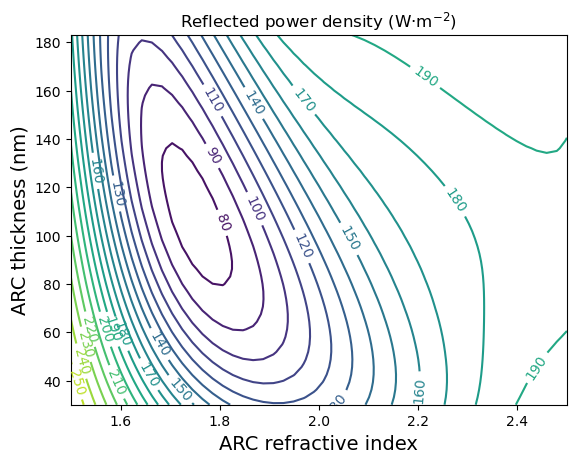

In [9]:
fig, ax = plt.subplots()
CS = ax.contour(n_ARC, thick_ARC, rfl_power, 20)
plt.xlabel('ARC refractive index', size=14)
plt.ylabel('ARC thickness (nm)', size=14)

ax.clabel(CS, CS.levels, inline=True, fontsize=10)
ax.set_title("Reflected power density (W·m$^{-2}$)")

# Save figure
plt.savefig("fig_S5.8.png", dpi=300)

We obtain a maximum power for a refractive index around 1.8 and thickness around 110 nm. In practice, this refractive index may not be possible to attain with the materials available. For SiNx, with a higher refractive index, the optimum thickness is lower, around 70-80 nm.